# Iron Losses

In [1]:
import matplotlib.pyplot as plt
import femagtools.tks
import femagtools.plot
import logging

In [2]:
logging.basicConfig(level=logging.INFO,
                        format='%(asctime)s %(message)s')

Load Thyssen File

In [3]:
tks = femagtools.tks.Reader('TKS_M_330-35_A.txt')

2024-07-11 17:48:16,183 TKS_M_330-35_A.txt Bmax 2.05
2024-07-11 17:48:16,188 Jordan loss coeffs [1.05640523 0.04937033 2.1538105  1.58220688 2.00355249]
2024-07-11 17:48:16,190 Steinmetz loss coeffs [2.31211074 1.55818869 1.98879215]
2024-07-11 17:48:16,196 Bertotti loss coeffs [2.35721618e-02 7.11774692e-05 5.70557184e-04]


In [4]:
tks = femagtools.tks.Reader('TKS_M270-50_A.txt')

2024-07-11 17:48:16,207 TKS_M270-50_A.txt Bmax 1.98
2024-07-11 17:48:16,208 Jordan loss coeffs [0.93478312 0.36062749 1.47393394 1.81057941 2.53229964]
2024-07-11 17:48:16,210 Steinmetz loss coeffs [1.55590935 1.7961956  2.52913758]
2024-07-11 17:48:16,216 Bertotti loss coeffs [2.19693050e-02 9.73904841e-05 4.78345109e-04]


Show Bertotti loss coefficients

In [5]:
tks.bertotti

{'ch': 0.02196930496538005,
 'cw': 9.739048407022554e-05,
 'ce': 0.00047834510925596726,
 'alpha': 2.0,
 'Bo': 1,
 'fo': 1}

In [6]:
tks.jordan

{'ch': 0.9347831198249271,
 'cw': 1.4739339440805825,
 'ch_freq': 0.36062748652736765,
 'cw_freq': 1.810579408346033,
 'b_coeff': 2.5322996357242924,
 'Bo': 1.5,
 'fo': 50.0}

In [7]:
tks.steinmetz

{'cw': 1.5559093538120745,
 'cw_freq': 1.7961955987323361,
 'b_coeff': 2.5291375795151554,
 'Bo': 1.5,
 'fo': 50.0}

In [8]:
femagtools.tks.tableview(tks)

|                                    |       Jordan       |     Steinmetz      |      Bertotti      |
|       Hysteresis Loss Factor       |   9.34783120e-01   |         -          |   2.19693050e-02   |
|      Eddy Current Loss Factor      |   1.47393394e+00   |   1.55590935e+00   |   9.73904841e-05   |
|         Excess Loss Factor         |         -          |         -          |   4.78345109e-04   |
|         Hyteresis Exponent         |   3.60627487e-01   |         -          |         -          |
|       Eddy Current Exponent        |   1.81057941e+00   |   1.79619560e+00   |         -          |
|      Induction Loss Exponent       |   2.53229964e+00   |   2.52913758e+00   |         -          |
| Induction Loss Exponent (Bertotti) |         -          |         -          |   2.00000000e+00   |
|        Reference Induction         |   1.50000000e+00   |   1.50000000e+00   |   1.00000000e+00   |
|        Reference Frequency         |   5.00000000e+01   |   5.00000000e+01   |  

Show normalized loss table

In [9]:
print(''.join(['    '] + [f'{b:9.1f}' for b in tks['losses']['B']]))
for f, l in zip(tks['losses']['f'], tks['losses']['pfe']):
    print(''.join([f'{f:4.0f}'] + [f'{x:9.3f}' for x in l if x]))

          0.6      0.7      0.8      0.9      1.0      1.1      1.2      1.3      1.4      1.5      1.6      1.7      1.8      1.9
   0    0.249    0.317    0.389    0.475    0.563    0.665    0.792    0.935    1.153    1.346    1.474
  50    0.436    0.566    0.709    0.868    1.045    1.243    1.473    1.757    2.107    2.495    2.850    3.167    3.566    3.950
  60    0.558    0.725    0.912    1.119    1.349    1.606    1.903    2.269    2.719    3.218    3.655    4.069    4.586    5.087
 100    1.137    1.488    1.883    2.325    2.818    3.369    3.999    4.764    5.686    6.746    7.745    8.807    9.858   10.925
 200    3.143    4.150    5.310    6.633    8.135    9.765   11.684   13.953   16.747   20.038   23.331   26.946
 400    8.904   11.899   15.450   19.621   24.497   30.228   36.942   44.780   54.115   65.282
 500   12.606   16.955   22.142   28.306   35.578   44.126   54.251   66.222   80.402   97.011
 700   21.483   29.168   38.449   49.702   63.137   79.222   98.402  

Fit the Bertotti coeffs using the normalized loss values and the frequency > 200 Hz:

In [10]:
import femagtools.losscoeffs as lc
n = 5
pfe = [[x for x in y if x] for y in tks['losses']['pfe']]
B = tks['losses']['B']
lc.fit_bertotti(tks['losses']['f'][n:], B, pfe[n:])

array([3.41363090e-02, 9.55068350e-05, 2.03438432e-20])

Plot iron losses for different frequencies using Bertotti coefficients:

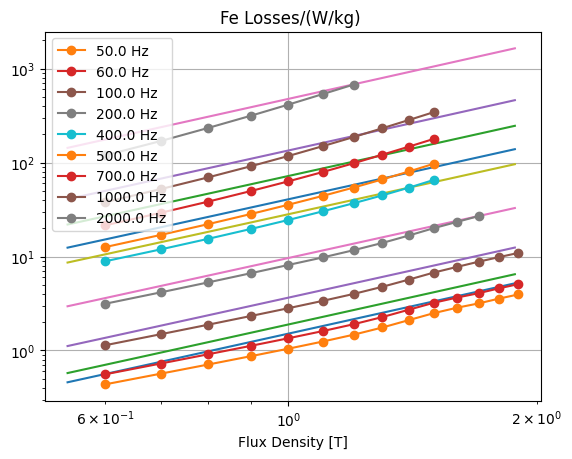

In [11]:
coeffs = [tks.bertotti[k] for k in ('ch', 'alpha', 'cw', 'ce')]
femagtools.plot.felosses(tks['losses'], coeffs, log=True)

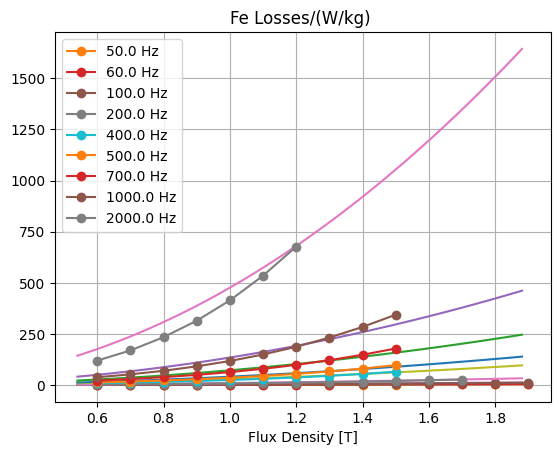

In [12]:
femagtools.plot.felosses(tks['losses'], coeffs, log=False)

Plot iron losses using Jordan coefficients

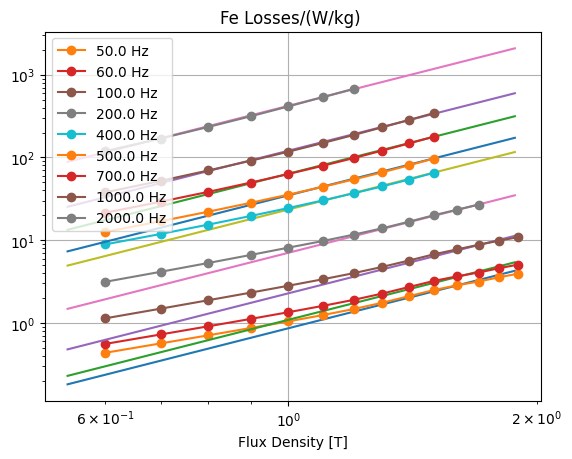

In [13]:
coeffs = [tks[k] for k in ('ch', 'ch_freq', 'cw', 'cw_freq', 'b_coeff')]
femagtools.plot.felosses(tks['losses'], coeffs, log=True)